---

# Deep Neural Network from Scratch - MLP

---

## Introduction

Neural networks consist of multiple layers, each containing numerous perceptrons. A perceptron combines the inputs through a linear equation and then applies a non-linear activation function to the outcome. This activation function introduces non-linearity into the model. To optimize the model, gradient descent is employed to update the weights and biases over several iterations.

Multilayer Perceptrons (MLP) are a type of Neural Network that are used for classification and regression problems. It is a class of feedforward artificial neural network. MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP uses a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

This picture represents a simple MLP model.

<img src= MLP_Plot.png alt="Drawing" style="width: 500px;"/>


---

## Algorithm

The algorithm for MLP is as follows:

1. Initialize the weights and biases randomly for each layer.
2. Feedforward phase: feed the input with random weights and biases to the network and calculate the output.
3. Backpropagation phase: calculate the error in the output layer and propagate it backwards to the first hidden layer.
4. Update the weights using learing rate and gradients descent.
5. Repeat steps 2-4 until the error is minimized.

Below is the detailed algorithm for MLP based on 2 hidden layes and 1 output layer.

### Feedforward phase:

1. For each neuron $i$ in the first hidden layer, calculate the weighted sum of inputs and biases:

$$
z^{(1)}_i = \sum_{j} w^{(1)}_{ij} x_j + b^{(1)}_i
$$

2. Apply the sigmoid activation function to the weighted sum for each neuron $i$ in the first hidden layer:

$$
a^{(1)}_i = \sigma(z^{(1)}_i) = \frac{1}{1 + e^{-z^{(1)}_i}}
$$

3. Repeat steps 1 and 2 for the second hidden layer, using the output from the first hidden layer:

$$
z^{(2)}_i = \sum_{j} w^{(2)}_{ij} a^{(1)}_j + b^{(2)}_i
$$

$$
a^{(2)}_i = \sigma(z^{(2)}_i) = \frac{1}{1 + e^{-z^{(2)}_i}}
$$

4. For the output layer, calculate the weighted sum of inputs and biases:

$$
z^{(3)}_i = \sum_{j} w^{(3)}_{ij} a^{(2)}_j + b^{(3)}_i
$$

5. Apply the softmax activation function to obtain class probabilities:

$$
a^{(3)}_i = \frac{e^{z^{(3)}_i}}{\sum_{j} e^{z^{(3)}_j}}
$$

### Cost function (MSE):

$$
C = \frac{1}{2n} \sum_{k=1}^{n} \sum_{i=1}^{2} (a^{(3)}_{ki} - y_{ki})^2
$$

### Backpropagation:

1. Calculate the error in the output layer:

$$
\delta^{(3)}_i = (a^{(3)}_i - y_i) \cdot \frac{\partial a^{(3)}_i}{\partial z^{(3)}_i}
$$

2. Calculate the gradient of the cost function with respect to the weights and biases in the output layer:

$$
\frac{\partial C}{\partial w^{(3)}_{ij}} = a^{(2)}_j \delta^{(3)}_i
$$

$$
\frac{\partial C}{\partial b^{(3)}_i} = \delta^{(3)}_i
$$

3. Calculate the error in the second hidden layer:

$$
\delta^{(2)}_i = \left( \sum_{j} \delta^{(3)}_j w^{(3)}_{ji} \right) \cdot \frac{\partial a^{(2)}_i}{\partial z^{(2)}_i}
$$

4. Calculate the gradient of the cost function with respect to the weights and biases in the second hidden layer:

$$
\frac{\partial C}{\partial w^{(2)}_{ij}} = a^{(1)}_j \delta^{(2)}_i
$$

$$
\frac{\partial C}{\partial b^{(2)}_i} = \delta^{(2)}
$$

### Weight update using stochastic gradient descent (SGD):

For each weight and bias in the network, update the values using the learning rate $\eta$ and the corresponding gradients computed during backpropagation:

1. Update the weights and biases in the output layer:

$$
w^{(3)}_{ij} \leftarrow w^{(3)}_{ij} - \eta \frac{\partial C}{\partial w^{(3)}_{ij}} = w^{(3)}_{ij} - \eta a^{(2)}_j \delta^{(3)}_i
$$

$$
b^{(3)}_i \leftarrow b^{(3)}_i - \eta \frac{\partial C}{\partial b^{(3)}_i} = b^{(3)}_i - \eta \delta^{(3)}_i
$$

2. Update the weights and biases in the second hidden layer:

$$
w^{(2)}_{ij} \leftarrow w^{(2)}_{ij} - \eta \frac{\partial C}{\partial w^{(2)}_{ij}} = w^{(2)}_{ij} - \eta a^{(1)}_j \delta^{(2)}_i
$$

$$
b^{(2)}_i \leftarrow b^{(2)}_i - \eta \frac{\partial C}{\partial b^{(2)}_i} = b^{(2)}_i - \eta \delta^{(2)}_i
$$

3. Update the weights and biases in the first hidden layer:

$$
w^{(1)}_{ij} \leftarrow w^{(1)}_{ij} - \eta \frac{\partial C}{\partial w^{(1)}_{ij}} = w^{(1)}_{ij} - \eta x_j \delta^{(1)}_i
$$

$$
b^{(1)}_i \leftarrow b^{(1)}_i - \eta \frac{\partial C}{\partial b^{(1)}_i} = b^{(1)}_i - \eta \delta^{(1)}_i
$$
---
## Advantages and Disadvantages


### Advantages

* MLP can predict for non-linear functions.
* MLP can be used for both classification and regression problems.
* MLP can make predictions without any prior knowledge of the data.


### Disadvantages

* MLP can only learn functions that are locally bounded, continuous, and differentiable.
* MLP takes a long time to train while the number of hidden layers and neurons increases.

---

## Implementation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [4]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Softmax activation function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# Mean squared error cost function
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Derivative of mean squared error cost function
def mse_derivative(y_true, y_pred):
    return y_pred - y_true

# Initialize weights and biases
def initialize_weights(input_size, hidden1_size, hidden2_size, output_size):
    W1 = np.random.randn(input_size, hidden1_size) #matrix of weights from input to hidden layer nodes
    b1 = np.zeros((1, hidden1_size)) #vector of biases for hidden layer nodes
    W2 = np.random.randn(hidden1_size, hidden2_size)
    b2 = np.zeros((1, hidden2_size))
    W3 = np.random.randn(hidden2_size, output_size)
    b3 = np.zeros((1, output_size))
    
    return W1, b1, W2, b2, W3, b3

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1 
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3

# Backward propagation
def backward_propagation(X, y, W1, b1, W2, b2, W3, b3, Z1, A1, Z2, A2, Z3, A3, learning_rate):
    m = X.shape[0]

    dZ3 = mse_derivative(y, A3) * (A3 - A3**2)
    dW3 = (1 / m) * np.dot(A2.T, dZ3)
    db3 = (1 / m) * np.sum(dZ3, axis=0, keepdims=True)

    dZ2 = np.dot(dZ3, W3.T) * sigmoid_derivative(A2)
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3

In [23]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Hyperparameters
input_size = 784
hidden1_size = 128
hidden2_size = 64
output_size = 10
learning_rate = 0.1
epochs = 40
batch_size = 64

# Initialize the weights and biases
W1, b1, W2, b2, W3, b3 = initialize_weights(input_size, hidden1_size, hidden2_size, output_size)

# Train the model
cost_history = []

for epoch in range(epochs):
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X_batch, W1, b1, W2, b2, W3, b3)

        # Backward propagation
        W1, b1, W2, b2, W3, b3 = backward_propagation(X_batch, y_batch, W1, b1, W2, b2, W3, b3, Z1, A1, Z2, A2, Z3, A3, learning_rate)

    # Calculate the training cost
    _, _, _, _, _, A3_train = forward_propagation(X_train, W1, b1, W2, b2, W3, b3)
    cost = mse(y_train, A3_train)
    cost_history.append(cost)

    print(f"Epoch {epoch + 1}/{epochs}, Training Cost: {cost:.4f}")


# Evaluate the model
_, _, _, _, _, A3_test = forward_propagation(X_test, W1, b1, W2, b2, W3, b3)
y_pred = np.argmax(A3_test, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred == y_true)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

#use the model to predict the class of an image
def predict(image):
    _, _, _, _, _, A3 = forward_propagation(image, W1, b1, W2, b2, W3, b3)
    return np.argmax(A3, axis=1)



Epoch 1/40, Training Cost: 0.0708
Epoch 2/40, Training Cost: 0.0566
Epoch 3/40, Training Cost: 0.0476
Epoch 4/40, Training Cost: 0.0432
Epoch 5/40, Training Cost: 0.0406
Epoch 6/40, Training Cost: 0.0387
Epoch 7/40, Training Cost: 0.0372
Epoch 8/40, Training Cost: 0.0360
Epoch 9/40, Training Cost: 0.0351
Epoch 10/40, Training Cost: 0.0343
Epoch 11/40, Training Cost: 0.0336
Epoch 12/40, Training Cost: 0.0330
Epoch 13/40, Training Cost: 0.0325
Epoch 14/40, Training Cost: 0.0320
Epoch 15/40, Training Cost: 0.0316
Epoch 16/40, Training Cost: 0.0312
Epoch 17/40, Training Cost: 0.0309
Epoch 18/40, Training Cost: 0.0305
Epoch 19/40, Training Cost: 0.0302
Epoch 20/40, Training Cost: 0.0299
Epoch 21/40, Training Cost: 0.0296
Epoch 22/40, Training Cost: 0.0294
Epoch 23/40, Training Cost: 0.0291
Epoch 24/40, Training Cost: 0.0289
Epoch 25/40, Training Cost: 0.0287
Epoch 26/40, Training Cost: 0.0285
Epoch 27/40, Training Cost: 0.0283
Epoch 28/40, Training Cost: 0.0281
Epoch 29/40, Training Cost: 0

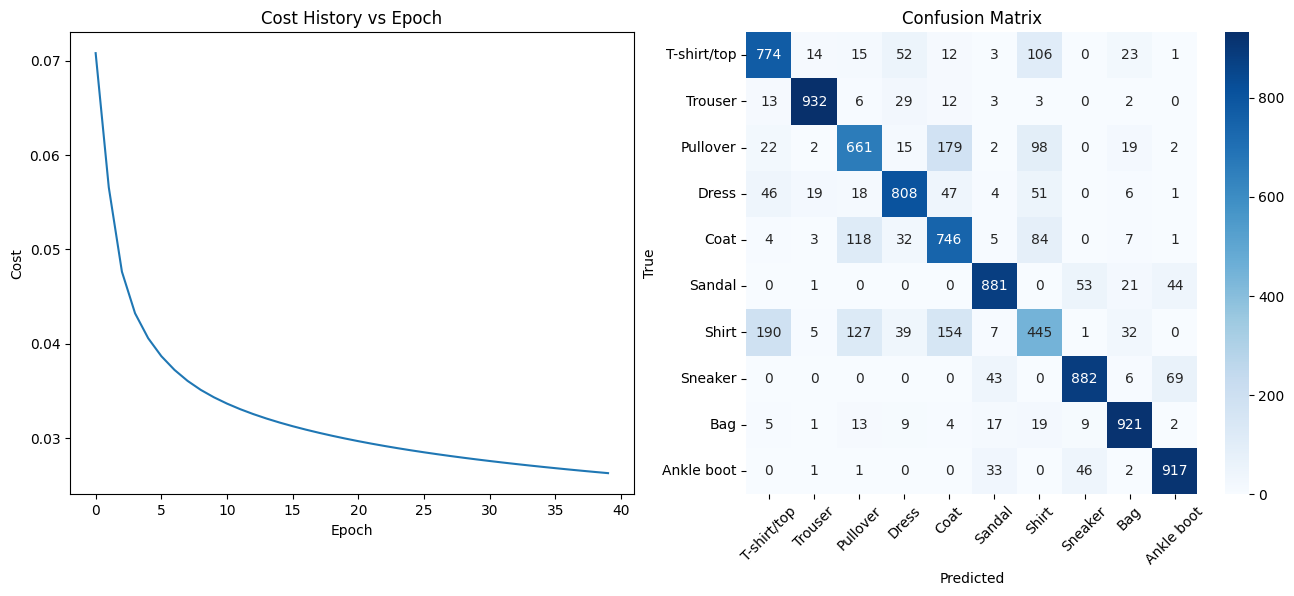

In [41]:
#show the coresponding name for each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#plot two graphs: cost history vs epoch and confusion matrix in one row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


#plot the cost history vs epoch

ax[0].plot(cost_history)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Cost")
ax[0].set_title("Cost History vs Epoch")


#plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
#chose a lighter color for the confusion matrix and use numbers without exponential notation
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")
ax[1].set_title("Confusion Matrix")
ax[1].set_xticklabels(class_names, rotation=45)
ax[1].set_yticklabels(class_names, rotation=0)

plt.show()


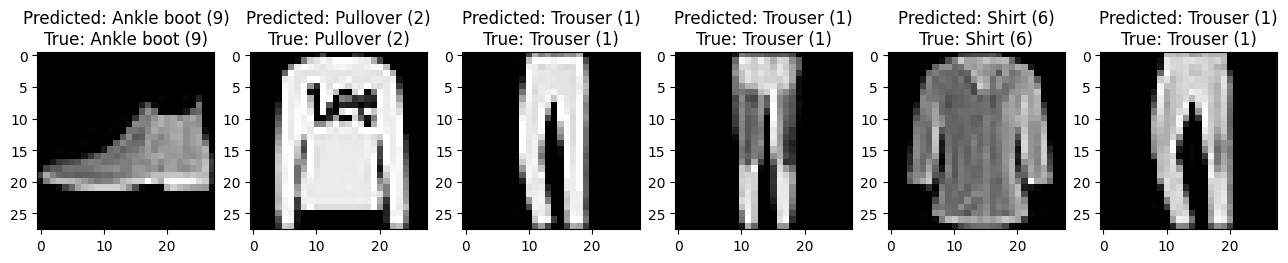

In [53]:
#show the first 10 images from the test set with their predicted and true labels
fig, ax = plt.subplots(1, 6, figsize=(16, 6))

for i in range(6):
    image = X_test[i].reshape(1, -1)
    prediction = predict(image)
    ax[i].imshow(image.reshape(28, 28), cmap="gray")
    ax[i].set_title(f"Predicted: {class_names[prediction[0]]} ({prediction[0]})\nTrue: {class_names[y_true[i]]} ({y_true[i]})")



---

## Conclusion


From the above implementation, MLP is a simple and powerful algorithm that can be use for classification and regression problems. With the right hyperparameters and number of iterations, the algorithm can achieve high accuracy. 

